## Manometer (to be completed)


Consider a u-tube manometer of cross-sectional area $A$, filled with a liquid of density $\rho$, the total length of the liquid column $L$. When the ends are open and exposed to the same environmental pressure $P$, the liquid levels in the two the legs of the device will reach the same level. We'll measure the levels in the tubes as a deviation $y$ from this equilibrium position.

## Model 1. Steady State Response to a Pressure Differential

For this first model we will that the ends of the u-tube are exposed to a pressure differential $\Delta P$.  How does the level in the tubes change?

At steady state the difference in the levels of the tubes will be $2y$. The static pressure difference 

$$\Delta P = 2\rho g y$$

or 

$$y = \frac{\Delta P}{2\rho g}$$

This is simple statics. Notice that neither the cross-sectional area or the length of the liquid column matter.  This is the rationale behind the common water level.

<img src="../images/640px-Schlauchwaage_Schematik.svg.png" width=200 />

In [54]:
g = 9.8          # m/s^
L = 1.0          # m
rho = 1000.0     # kg/m^3

deltaP = 1000.0  # Pascals

y = deltaP/2/rho/g
print("y = {0:0.3g} meters".format(y))

y = 0.051 meters


## Model 2. Dynamic Response with Negligible Viscosity


$$ A \Delta P = m \frac{d^2y}{dt^2} + 2 A \rho g y$$

where $m$ is the mass of the liquid and $A$ is the cross-sectional area of the u-tube. The mass of liquid is 

$$m = \rho A L $$

where $L$ is the total length of the liquid column.  Putting this together we see the factor $A$ cancels out of every term, leaving

$$ \rho L \frac{d^2y}{dt^2} + 2 \rho g y = \Delta P $$

At steady state this simplifies directly to the static case. This dynamic model can be simplified to

$$ \frac{d^2y}{dt^2} + \frac{2 g}{L} y = \frac{1}{\rho L} \Delta P$$

$$\omega = \sqrt{\frac{2 g}{L}}$$

State-space model

$$\begin{align*}
\frac{dy}{dt} & = v \\
\frac{dv}{dt} & = -\frac{2g}{L} y + \frac{1}{\rho L} \Delta P 
\end{align*}$$

The 'state' of the system is given by 

$$x = \left[\begin{array}{c}y \\ v\end{array}\right]$$

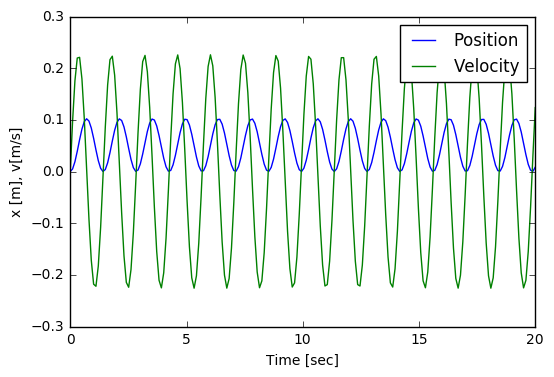

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

L = 1.0  # meters

def f(X,t):
    x,v = X
    xdot = v
    vdot = -(2*g/L)*x + deltaP/rho/L
    return [xdot,vdot]

IC = [0,0]
t = np.linspace(0,20,200)
sol = odeint(f,IC,t)
plt.plot(t,sol)
plt.xlabel('Time [sec]')
plt.ylabel('x [m], v[m/s]')
plt.legend(['Position','Velocity'])


## Model 3. Dynamic Response with Viscous Dissipation

The pressure drop due to the laminar flow of incompressible Newtonian fluid in a long pipe with circular cross-section is given by the Hagen-Poiseuille equation

$$\Delta P_{drag} = \frac{32 \mu L v}{d^2}$$

where $\mu$ is dynamic viscosity and $d$ is pipe diameter. Recasting in terms of cross-sectional area

$$A = \frac{\pi d^2}{4}$$

gives

$$\Delta P_{drag} = \frac{8 \pi \mu L v}{A}$$

Let's assume this is a good model for the viscous dissipation that takes place inside the u-tube manometer. Doing a balance of forces acting on the fluid column

$$\rho AL\frac{d^2y}{dt^2} + 8\frac{\pi \mu L v}{A} + 2 A \rho g y = A \Delta P$$

Substituting for velocity


$$\frac{d^2y}{dt^2} + 8 \frac{\pi \mu }{\rho A^2}\frac{dy}{dt} + 2\frac{g}{L} y = \frac{1}{\rho L} \Delta P$$

$$\frac{d^2y}{dt^2} + 128 \frac{\nu }{\pi d^4}\frac{dy}{dt} + 2\frac{g}{L} y = \frac{1}{\rho L} \Delta P$$

where the kinematic viscosity $\nu = \frac{\mu}{\rho}$ has been introduced.

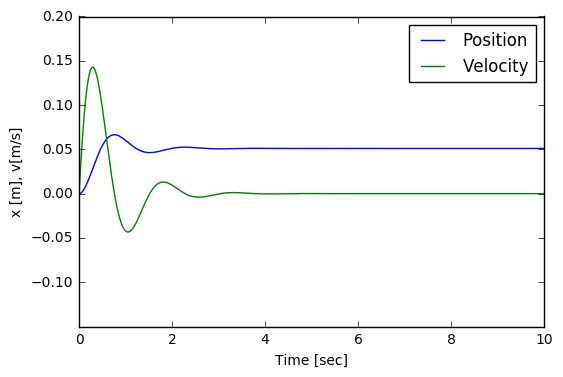

In [57]:
nu = 1.0e-6    # m/s^2
d = 0.05      # m

def model3(d = 0.05):

    def f(X,t):
        x,v = X
        xdot = v
        vdot = -(2*g/L)*x - (128*nu/np.pi/d**4)*v + deltaP/rho/L
        return [xdot,vdot]

    IC = [0,0]
    t = np.linspace(0,10,20000)
    sol = odeint(f,IC,t)
    plt.plot(t,sol)
    plt.xlabel('Time [sec]')
    plt.ylabel('x [m], v[m/s]')
    plt.legend(['Position','Velocity'])
    plt.ylim(-0.15,0.2)

from ipywidgets import interact

interact(model3,d=(0.01,0.12,0.002));

## Damping of Oscillatory Systems

Standard form of a damped oscillator

$$\frac{d^2y}{dt^2} + 2\zeta\omega\frac{dy}{dt} + \omega^2 y = u(t)$$

Examples include buildings, car suspensions, other structures. 

#### Undamped ($\zeta = 0$)

#### Underdamped ($\zeta < 1$)

#### Critically damped ($\zeta = 1$)

#### Overdamped ($\zeta > 1$)


## Response to a Sinusoidal Pressure Signal

## State Space Model

## Transfer Function Model